### Salary Prediction 

#### In this project we are going to analyze a dataset to make predictions of salary for a new employee
#### Salary is the target

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the dataset into a dataframe 

data = pd.read_csv('salarydata.csv')

In [3]:
# display first 5 records

data.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# display shape of data 

data.shape

(32561, 14)

In [5]:
#describe data

data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [7]:
columns = ['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary']
print("%20s %15s   %15s %15s" % ("Column Name", "Data Type", "Distinct Count", "Null Values"))
for col in data.columns:
    data_type = data[col].dtype
    uniq = data[col].nunique()
    na = data[col].isna().sum()
    print("%20s %15s %15s %15s" % (col, data_type, uniq, na))

         Column Name       Data Type    Distinct Count     Null Values
                 age           int64              73               0
           workclass          object               9               0
           education          object              16               0
       education-num           int64              16               0
      marital-status          object               7               0
          occupation          object              15               0
        relationship          object               6               0
                race          object               5               0
                 sex          object               2               0
        capital-gain           int64             119               0
        capital-loss           int64              92               0
      hours-per-week           int64              94               0
      native-country          object              42               0
              salary          ob

#### Exploratory Data Analysis and Preprocessing

In [8]:
# Univariate Analysis

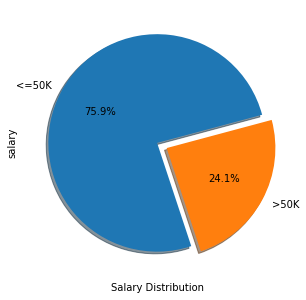

In [9]:
# Analyzing Target salary 
plt.figure(figsize=(5,5))
data['salary'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,startangle=15)
plt.xlabel("Salary Distribution")
plt.show()

In [10]:
data['salary'].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [11]:
# The target salary seems to have unbalanced data <=50K class has 75.9% values but the other class seems to have only 24.1%

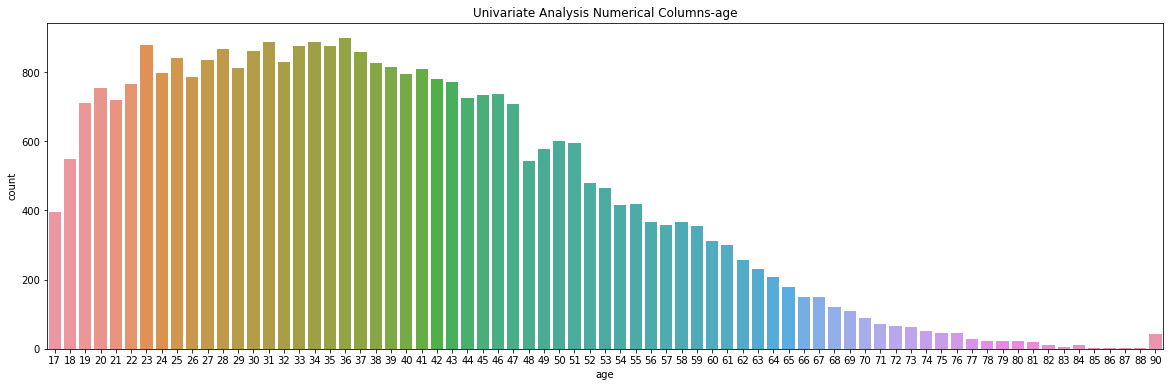

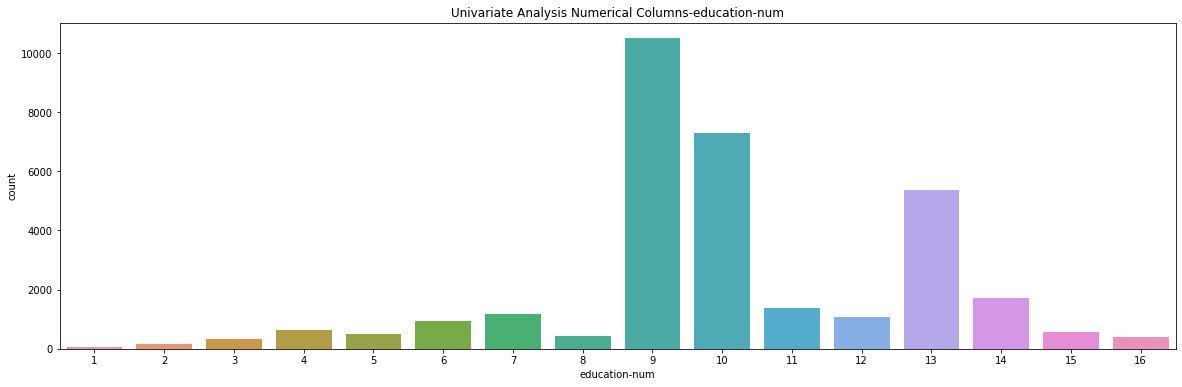

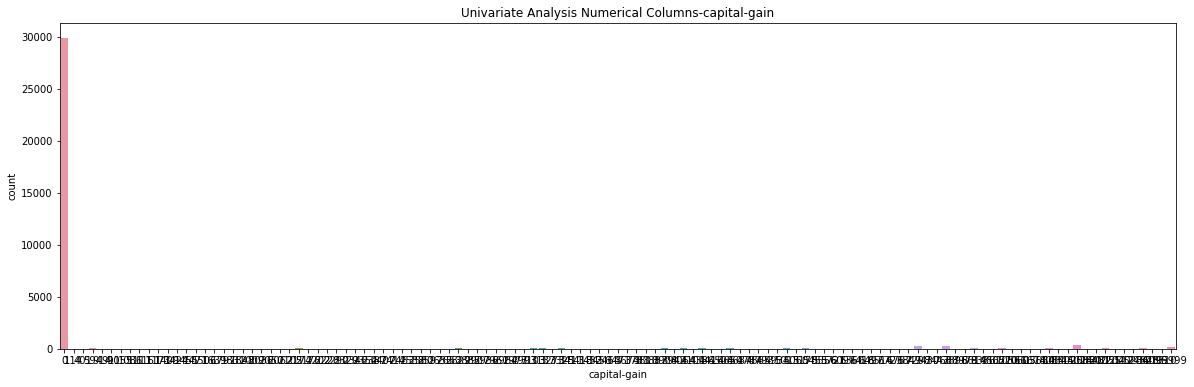

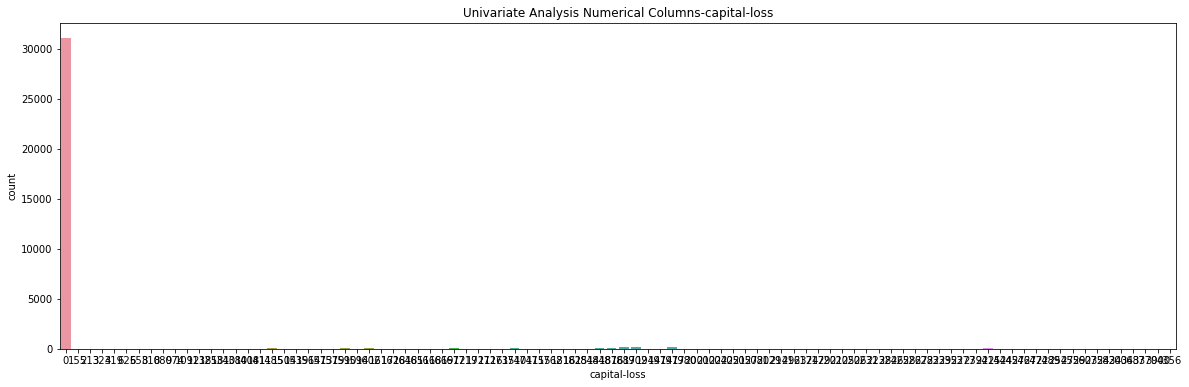

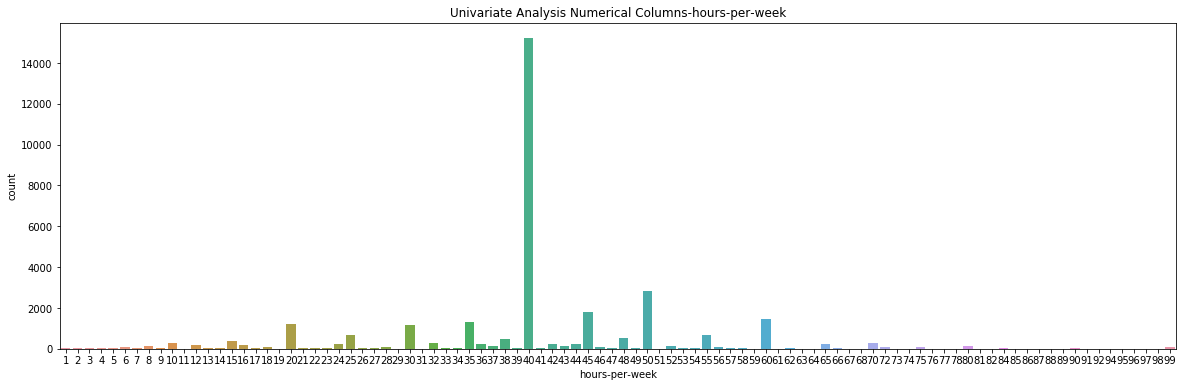

In [12]:
# Exploratory Data Analysis

col = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

for i in col:
    plt.figure(figsize=(20,6))
    sns.countplot(x=i, data=data)
    plt.title(f'Univariate Analysis Numerical Columns-{i}')
    plt.show()

C:\Users\akshathi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


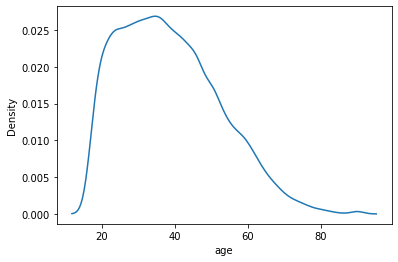

In [13]:
sns.set_color_codes()
sns.distplot(data['age'],hist=False)
plt.show()

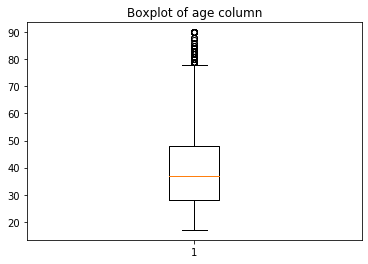

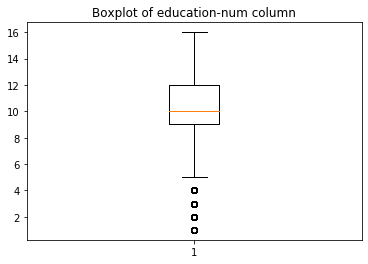

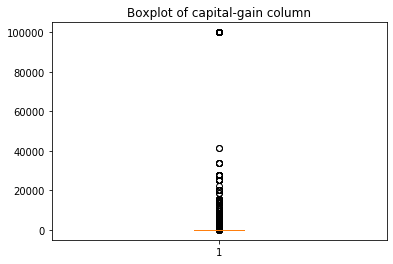

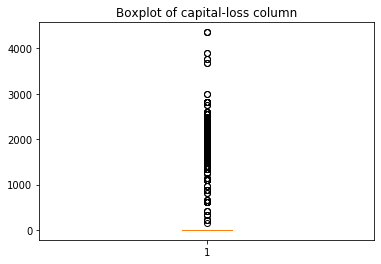

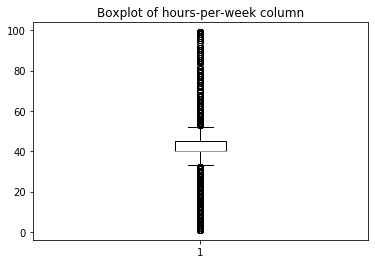

In [14]:
# Plotting box plot of numerical
col = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

for i in col:
    plt.boxplot(data[i])
    plt.title(f'Boxplot of {i} column')
    plt.show()

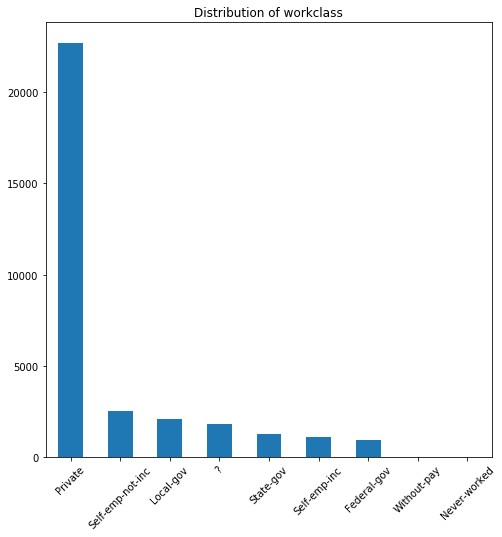

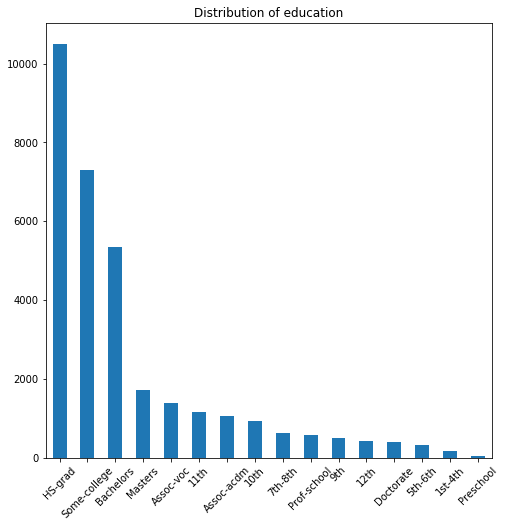

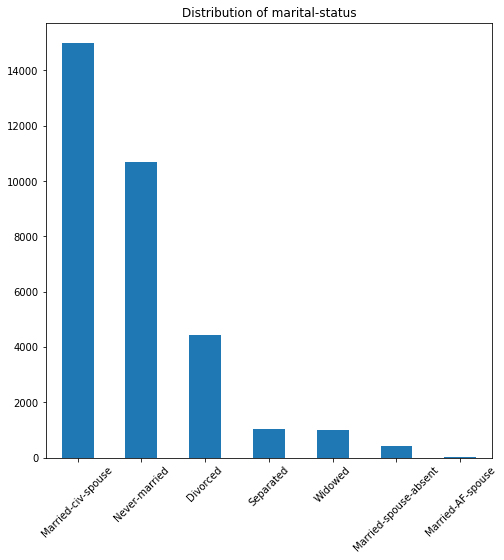

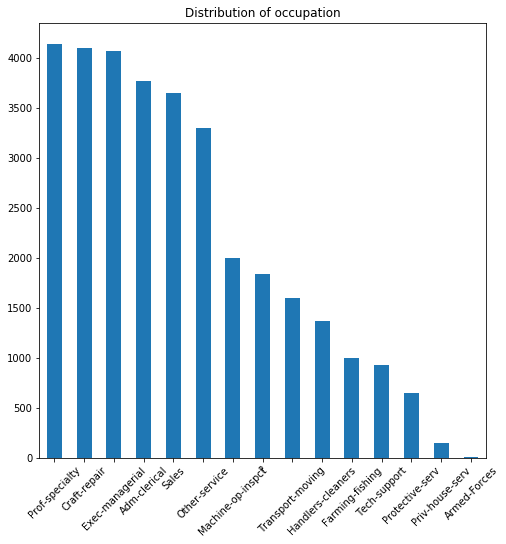

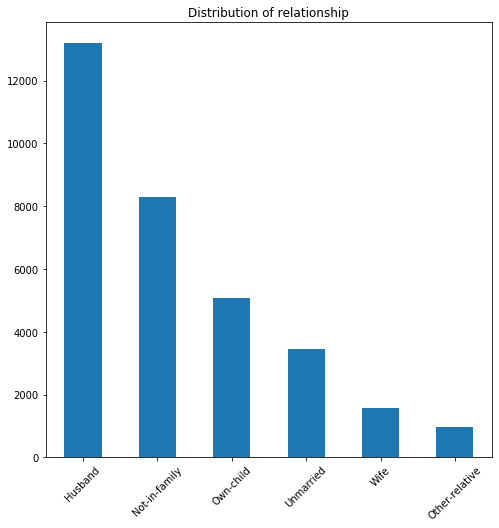

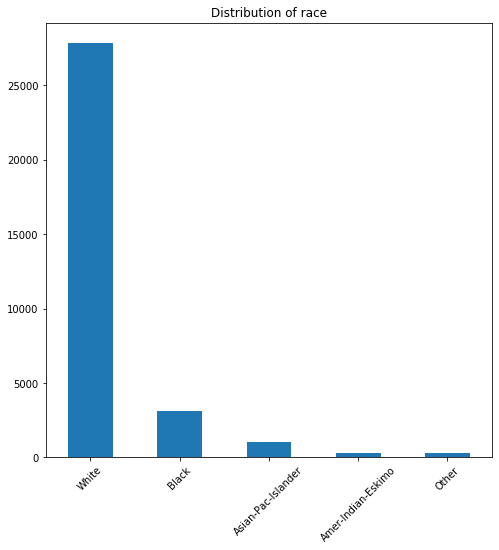

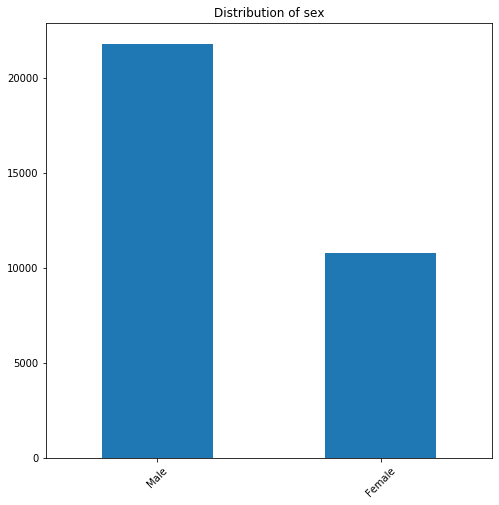

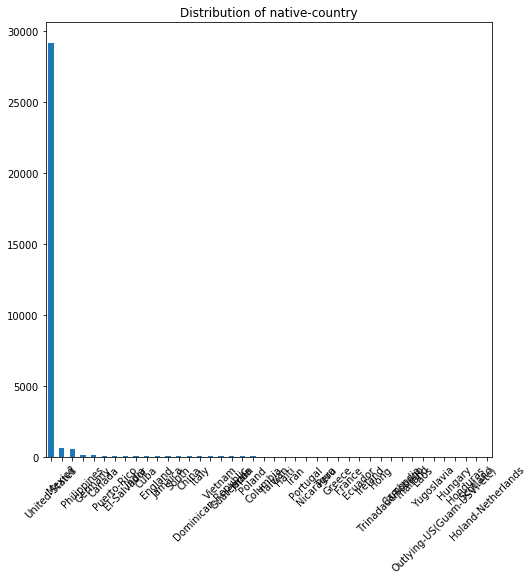

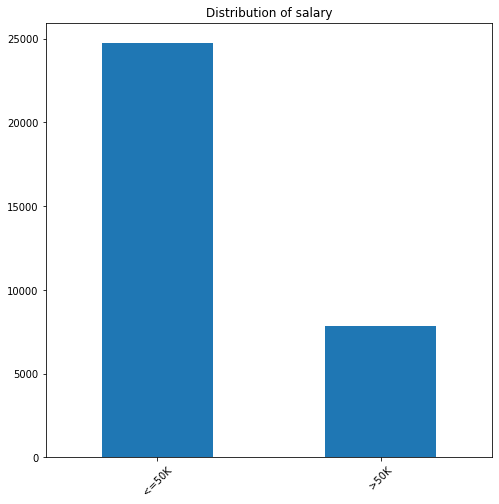

In [15]:

columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for col in columns:
    plt.figure(figsize=(8,8))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [16]:
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for col in columns:
    print(f'Distribution of {col}')
    print(data[col].nunique())
    print(data[col].value_counts())

Distribution of workclass
9
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Distribution of education
16
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Distribution of marital-status
7
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
Distribution

In [17]:
## It is seen that all the columns does'nt contain any null values. 
# But certain columns such as workclass, occupation contain erronneous value '?' this can be
#removed
#relationship and education-num can be removed

In [18]:
# Bivariate Analysis

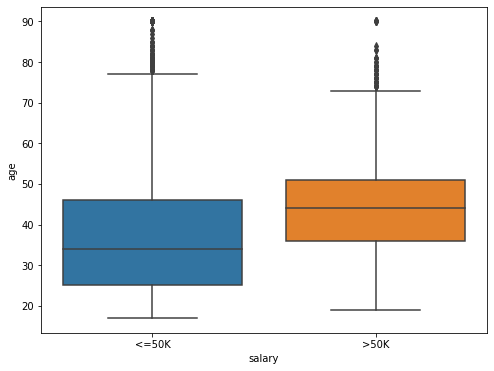

In [19]:
# Income wrt age
plt.figure(figsize=(8,6))
sns.boxplot(x='salary',y='age',data=data)
plt.show()

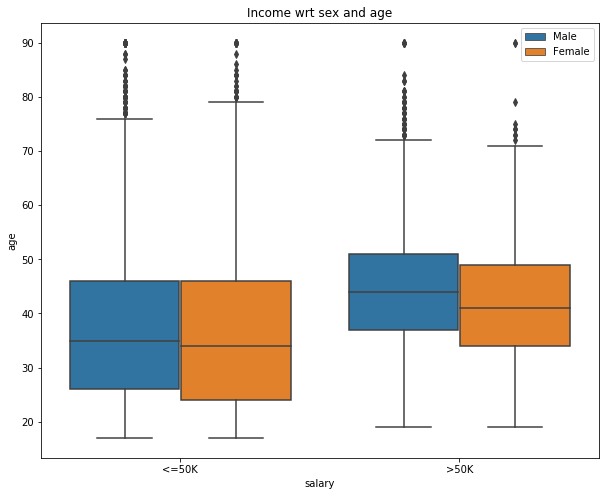

In [20]:
# Income w.r.t sex and age
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='age',hue='sex',data=data)
ax.set_title("Income wrt sex and age")
ax.legend(loc='best')
plt.show()

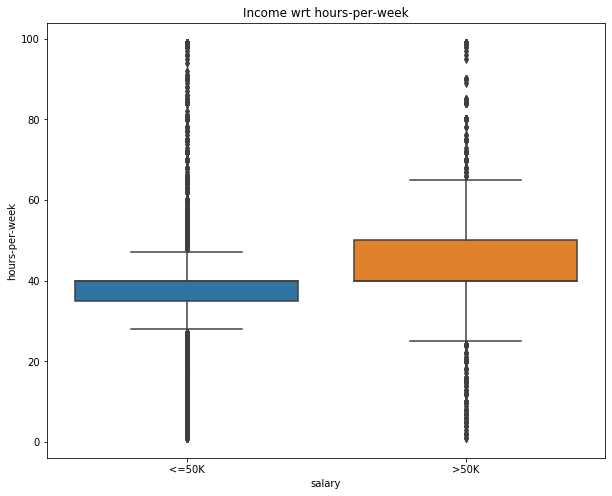

In [21]:
# Income w.r.t hours-per-week
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='hours-per-week',data=data)
ax.set_title("Income wrt hours-per-week")
plt.show()

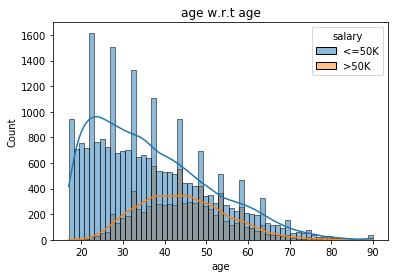

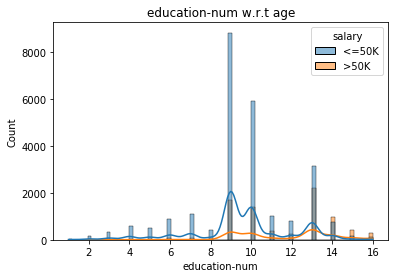

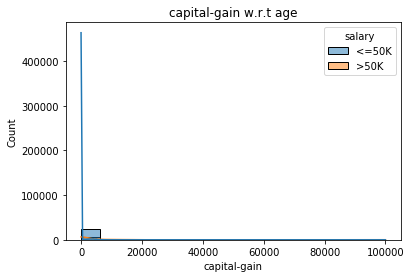

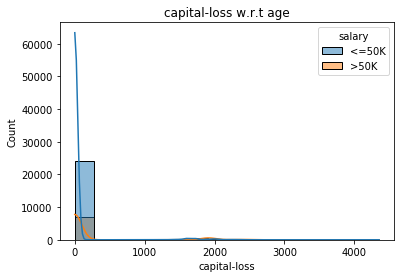

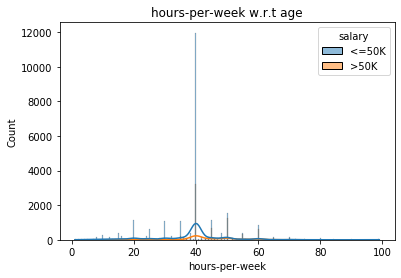

In [22]:
# Plot Histogram - target vs numerical columns

col = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

for i in col:
    sns.histplot(data = data, x = i, kde = True, hue = "salary")
    plt.title(f'{i} w.r.t age')
    plt.show()

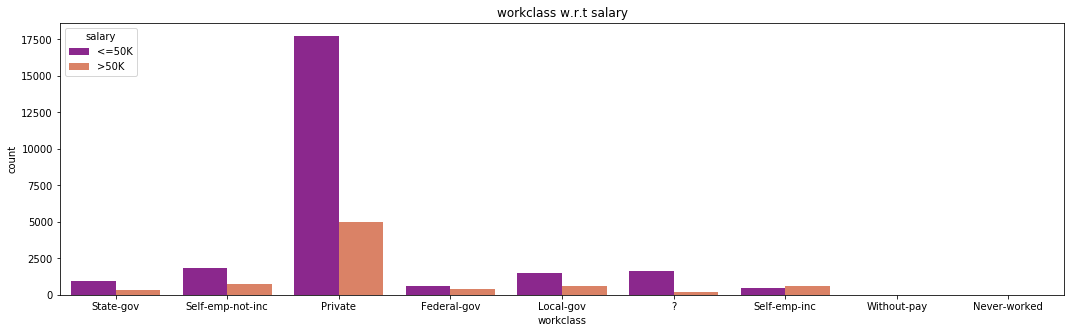

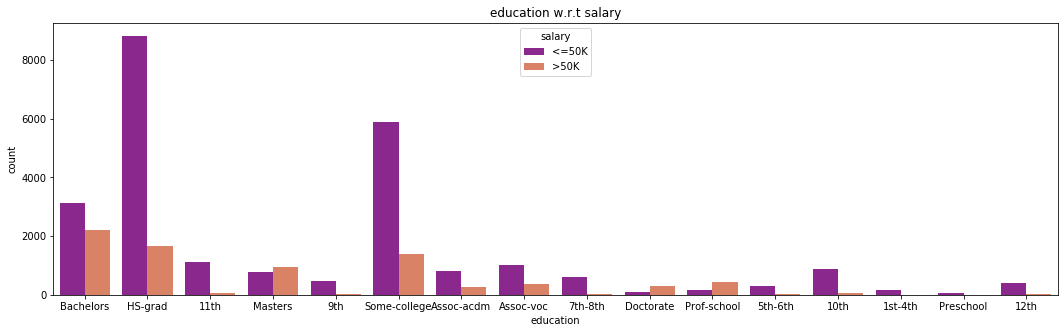

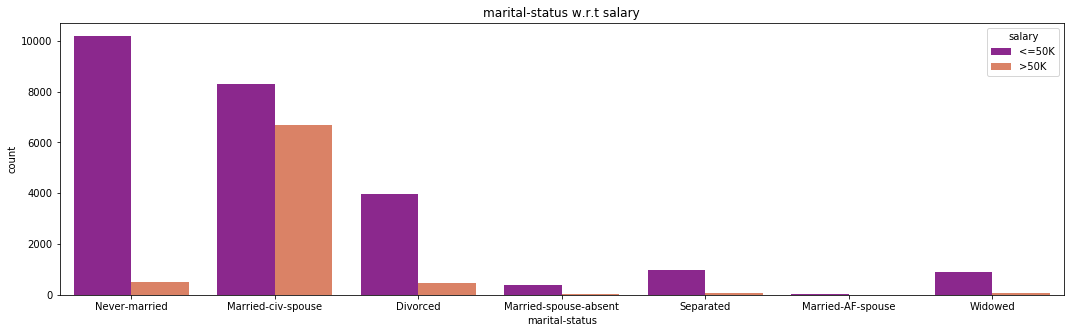

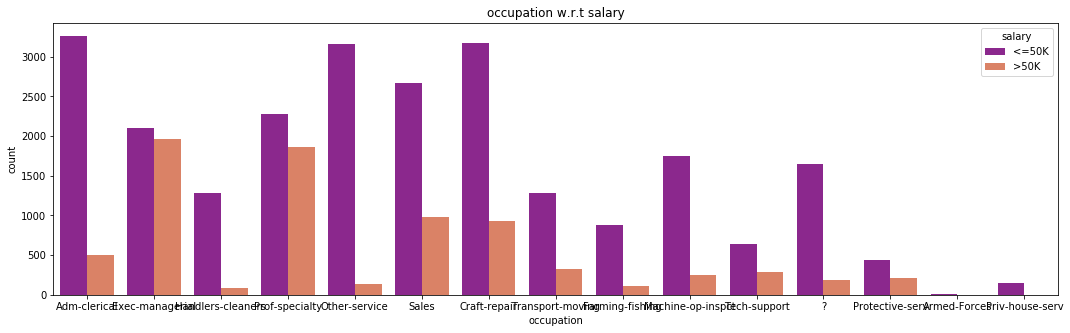

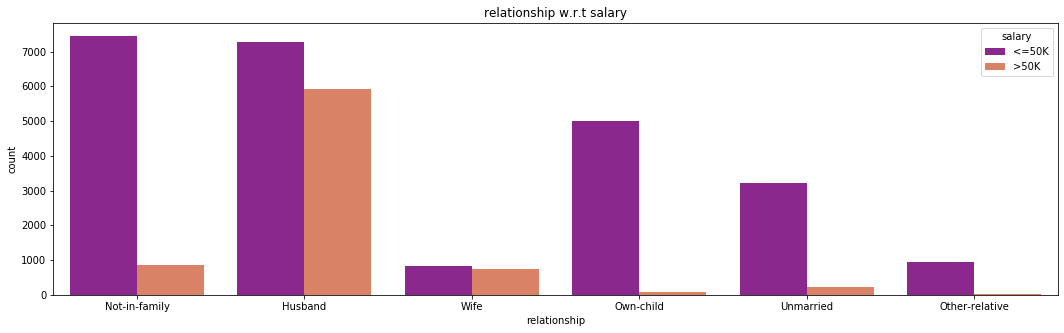

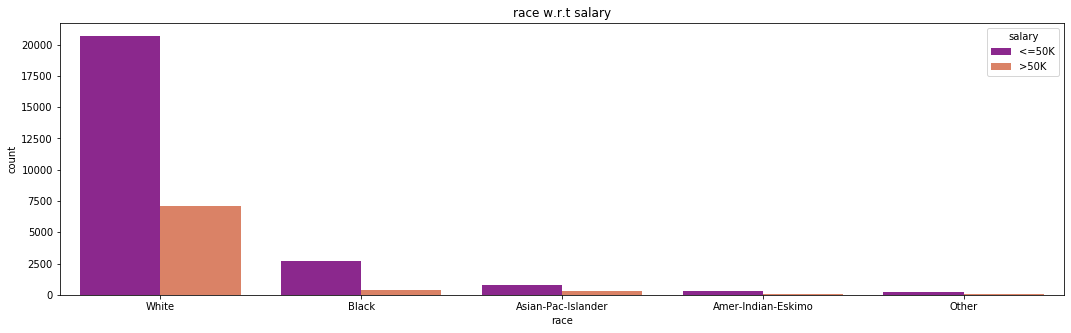

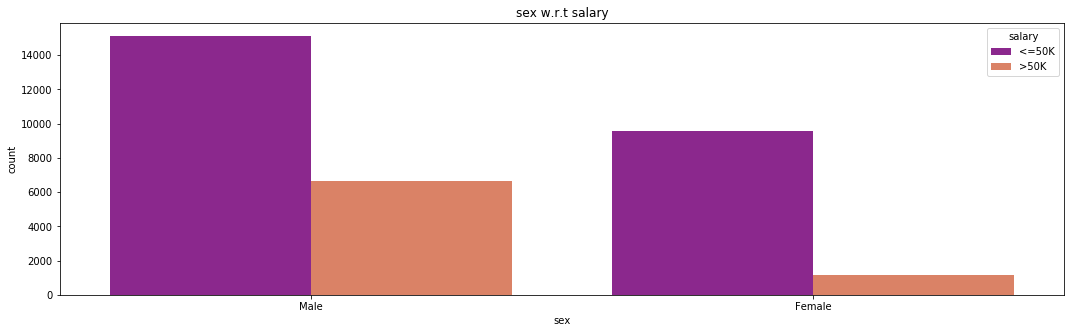

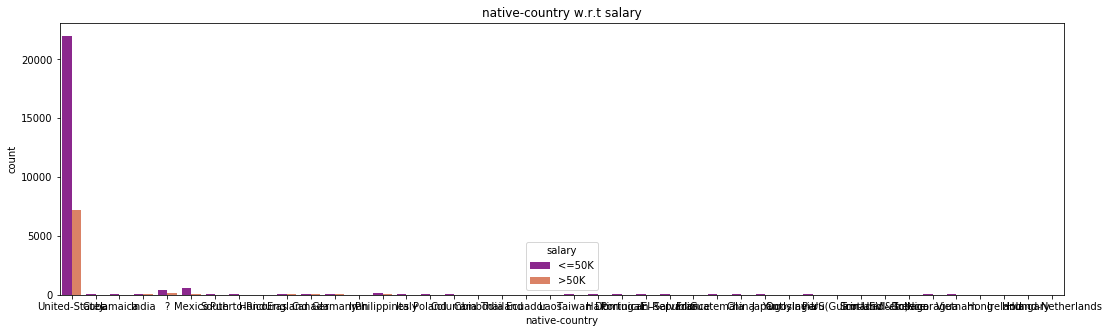

In [23]:
# Salary and categorical columns
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in columns:
    plt.figure(figsize=(18,5))
    sns.countplot(x=data[col],hue=data['salary'],palette='plasma')
    plt.title(f'{col} w.r.t salary')
    plt.show()

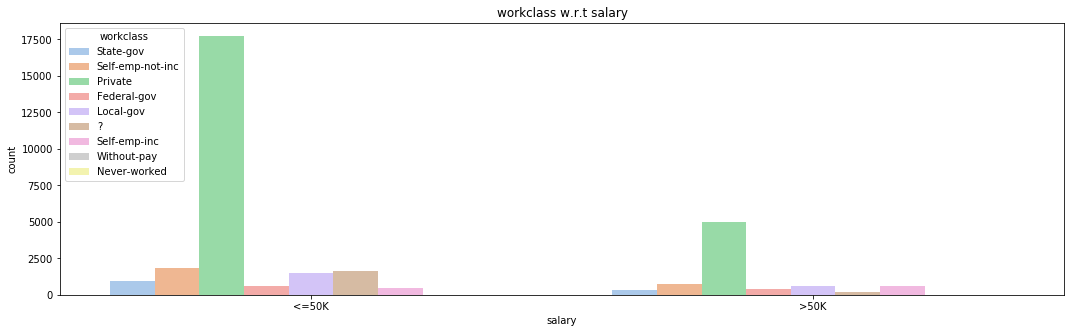

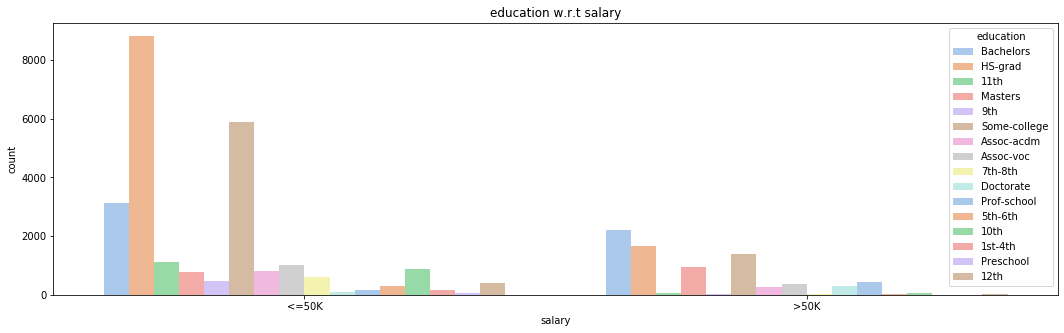

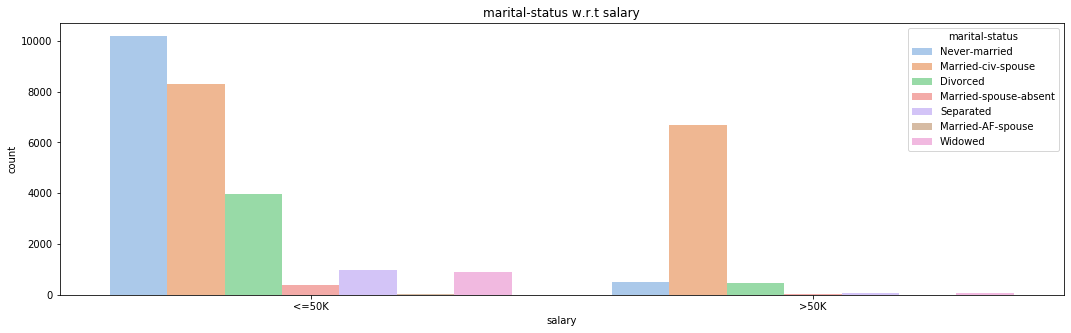

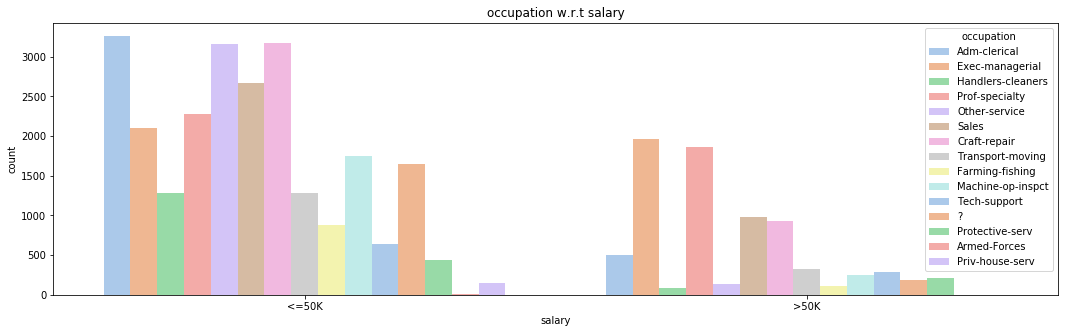

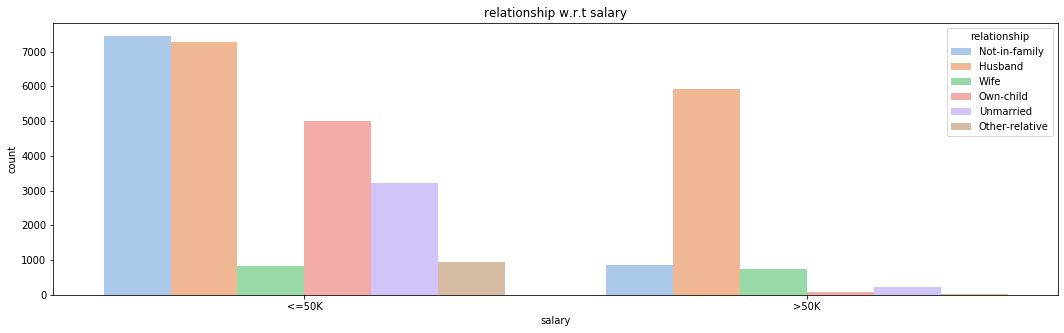

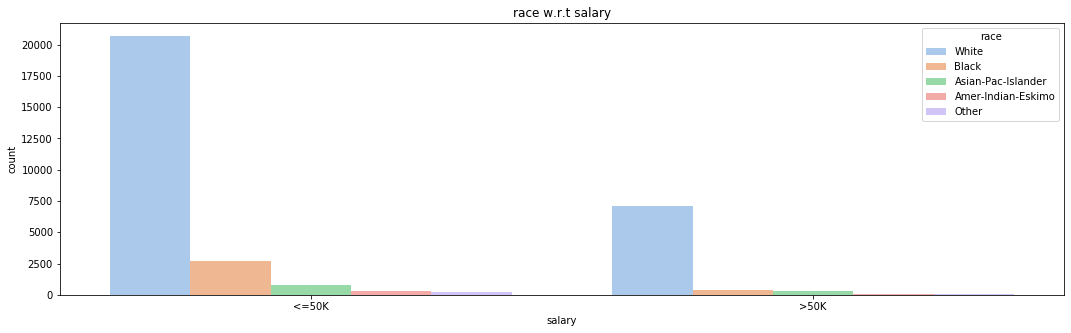

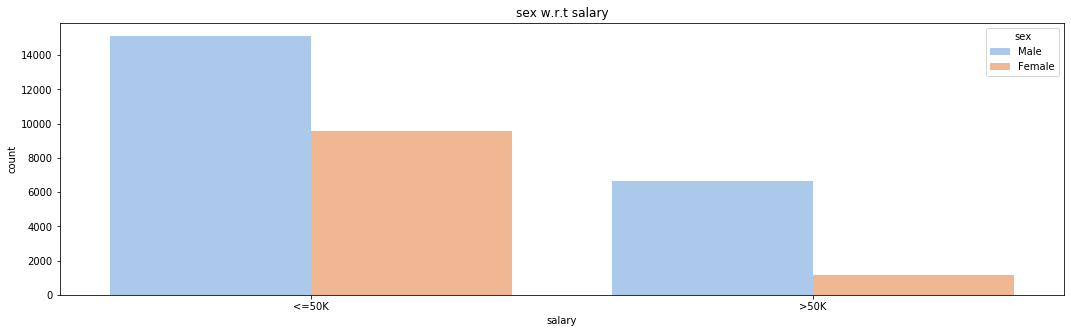

In [24]:
# Salary and categorical columns
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for col in columns:
    plt.figure(figsize=(18,5))
    sns.countplot(x=data['salary'],hue=data[col],palette='pastel')
    plt.title(f'{col} w.r.t salary')
    plt.show()

In [25]:
# dropping education-num and relationship columns
data.drop(['education-num','relationship','race'], axis=1, inplace=True)

In [26]:
# Encoding salary column 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['salary'] = label_encoder.fit_transform(data['salary'])
print(label_encoder.classes_)

['<=50K' '>50K']


In [27]:
# Multivariate Analysis
data.corr()['salary'][:].sort_values(ascending=False)


salary            1.000000
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
capital-loss      0.150526
Name: salary, dtype: float64

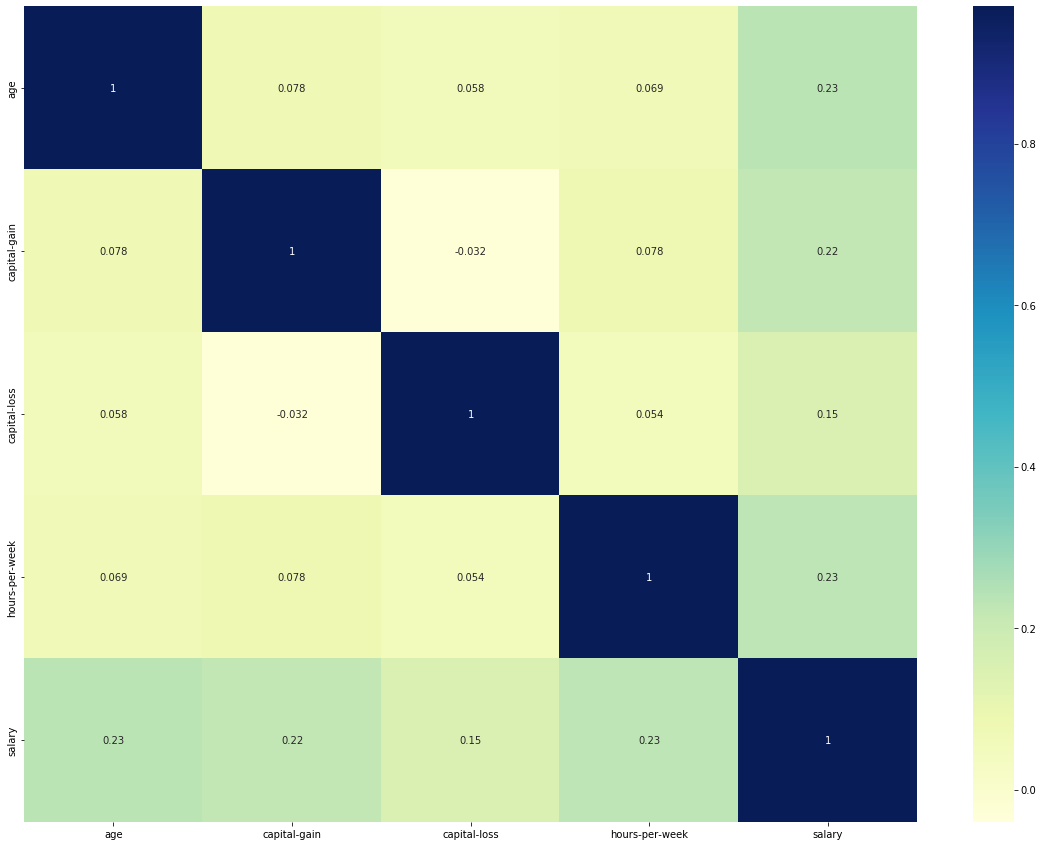

In [28]:
#plotting correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

In [29]:
# can remove columns capital gain,capital-loss and native-country since they do not contribute much to target salary

#### Handling Missing Values

In [30]:
#Finding the ? in the data frame 
data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [31]:
# code will replace the ? to NaN and then drop the columns 

data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)
#dropping the NaN rows 
data.dropna(how='any',inplace=True)

In [32]:
#Finding the ? in the data frame 
data.isin(['?']).sum(axis=0)

age                 0
workclass           0
education           0
marital-status      0
occupation          0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
salary              0
dtype: int64

In [33]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

#### Handling Outliers

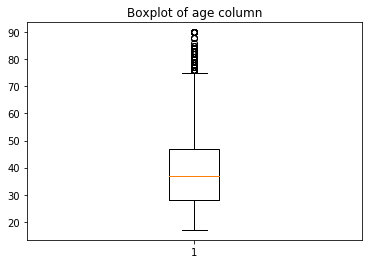

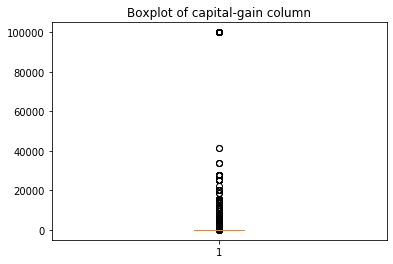

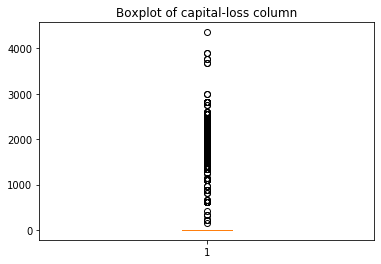

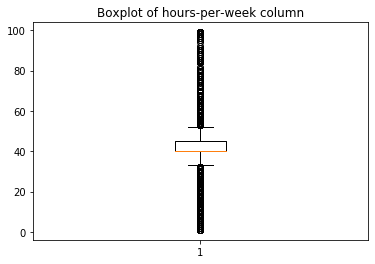

In [34]:
# Plotting box plot of numerical
columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in columns:
    plt.boxplot(data[col])
    plt.title(f'Boxplot of {col} column')
    plt.show()

In [35]:
#### IQR method to find Outliers in age

In [36]:
Q1 = np.percentile(data['age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['age'], 75, interpolation='midpoint')

In [37]:
data['age'].min()

17

In [38]:
print(Q1)
print(Q2)
print(Q3)

28.0
37.0
47.0


In [39]:
# Finding Inter Quartile Range 
IQR = Q3-Q1
print(IQR)

19.0


In [40]:
# Finding upper and lower limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-0.5
75.5


In [41]:
# Finding Outlier
outlier = []
for x in data['age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [42]:
# Capping data 

In [43]:
data['age'] = np.where(data['age'] > up_lim,
    up_lim, np.where(
        data['age'] < low_lim,
        low_lim,data['age']))

In [44]:
data['age']

0        39.0
1        50.0
2        38.0
3        53.0
4        28.0
         ... 
32556    27.0
32557    40.0
32558    58.0
32559    22.0
32560    52.0
Name: age, Length: 30718, dtype: float64

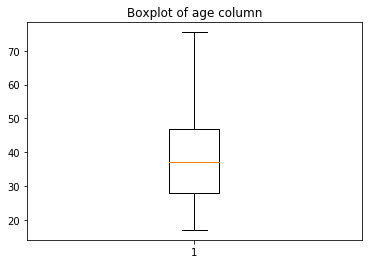

In [45]:
# Boxplot after capping values of age
plt.boxplot(data['age'])
plt.title(f'Boxplot of age column')
plt.show()

In [46]:
# function to group age into different classes
def hour_class(n):
    if n <= 35:
        return '<=35'
    elif n > 35 and n <=40:
        return '>35, <=40'
    elif n >40:
        return '>40'

In [47]:
data['hours-per-week'] = data['hours-per-week'].apply(lambda x:hour_class(x))

In [48]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [49]:
data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,">35, <=40",United-States,0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,<=35,United-States,0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,">35, <=40",United-States,0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,">35, <=40",United-States,0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,">35, <=40",Cuba,0


In [50]:
# mapping categorical values to numerical values

In [51]:
columns =['workclass', 'education', 'marital-status', 'hours-per-week', 'occupation', 'sex']
for col in columns:
    labels = data.groupby(col)['salary'].mean().sort_values().index
    print(col,'\n',labels,'\n')

workclass 
 Index(['Without-pay', 'Private', 'State-gov', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc'],
      dtype='object', name='workclass') 

education 
 Index(['Preschool', '1st-4th', '5th-6th', '9th', '11th', '7th-8th', '10th',
       '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Masters', 'Doctorate', 'Prof-school'],
      dtype='object', name='education') 

marital-status 
 Index(['Never-married', 'Separated', 'Married-spouse-absent', 'Widowed',
       'Divorced', 'Married-civ-spouse', 'Married-AF-spouse'],
      dtype='object', name='marital-status') 

hours-per-week 
 Index(['<=35', '>35, <=40', '>40'], dtype='object', name='hours-per-week') 

occupation 
 Index(['Priv-house-serv', 'Other-service', 'Handlers-cleaners', 'Armed-Forces',
       'Farming-fishing', 'Machine-op-inspct', 'Adm-clerical',
       'Transport-moving', 'Craft-repair', 'Sales', 'Tech-support',
       'Protective-serv', 'Prof-specialty', 'Exec-m

In [52]:
# Encoding all categorical values
for col in columns:
    labels = data.groupby(col)['salary'].mean().sort_values().index
    mapping_dict = {k: i for i, k in enumerate(labels, 0)}
    # apply encoding to our data
    data[col] = data[col].map(mapping_dict)

In [53]:
data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,2,12,0,6,1,2174,0,1,United-States,0
1,50.0,3,12,5,13,1,0,0,0,United-States,0
2,38.0,1,8,4,2,1,0,0,1,United-States,0
3,53.0,1,4,5,2,1,0,0,1,United-States,0
4,28.0,1,12,5,12,0,0,0,1,Cuba,0


In [54]:
# Multivariate Analysis
data.corr()['salary'][:].sort_values(ascending=False)


salary            1.000000
marital-status    0.391152
occupation        0.338955
education         0.335383
hours-per-week    0.263444
age               0.244897
capital-gain      0.221871
sex               0.216626
capital-loss      0.151461
workclass         0.151066
Name: salary, dtype: float64

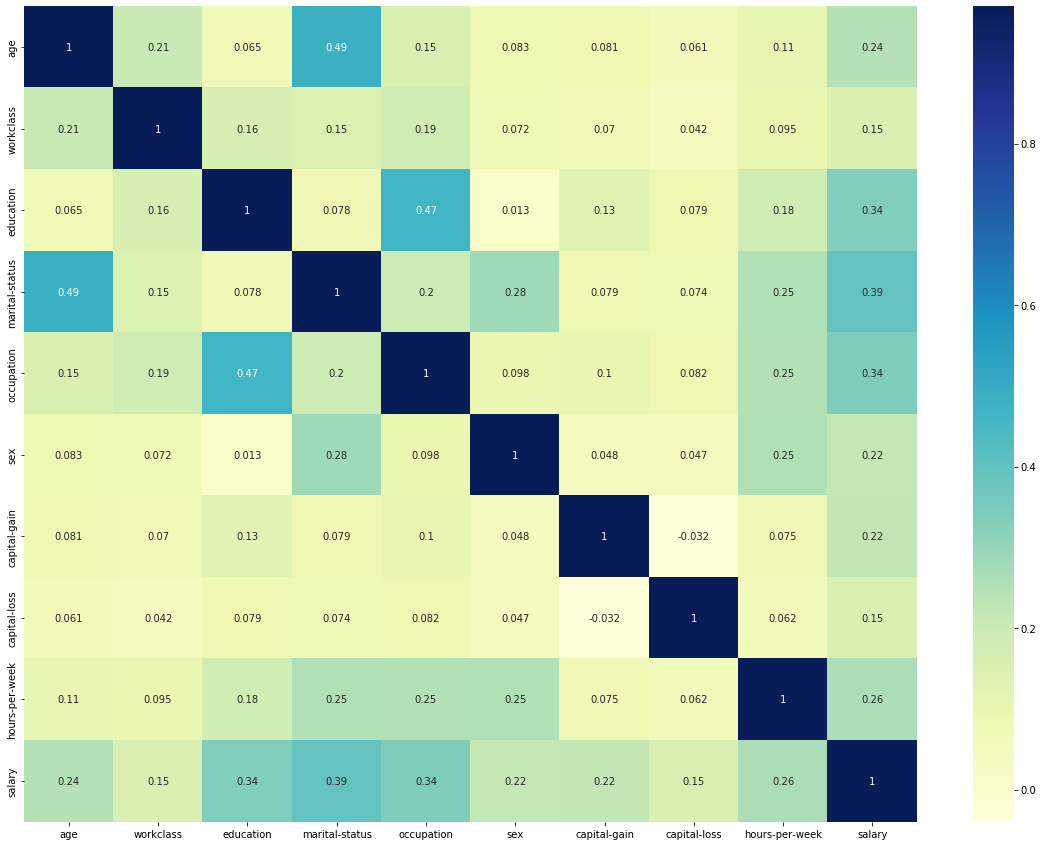

In [55]:
#plotting correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

In [56]:
data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,2,12,0,6,1,2174,0,1,United-States,0
1,50.0,3,12,5,13,1,0,0,0,United-States,0
2,38.0,1,8,4,2,1,0,0,1,United-States,0
3,53.0,1,4,5,2,1,0,0,1,United-States,0
4,28.0,1,12,5,12,0,0,0,1,Cuba,0
